In [1]:
# Add additional library
import sys, os
data_lib = os.path.abspath('../data')
if data_lib not in sys.path:
    sys.path.append(data_lib)

from data_utils import *
from visualisation_utils import *
import pywt

In [2]:
EDA_SAMPLING_RATE = 4

dp_manager = get_data_path_manager()
wesad_wrist_metadata = load_metadata(dp_manager.WESAD_wrist_metadata_path)

In [3]:
DATASET_NAME = 'WESAD'
DEVICE = 'wrist'
SIGNAL_NAME = 'EDA'
USER_ID = 'S10'

In [4]:
raw_signal = load_raw_signal(dp_manager, DATASET_NAME, USER_ID, DEVICE, SIGNAL_NAME)
user_metadata = wesad_wrist_metadata[USER_ID]

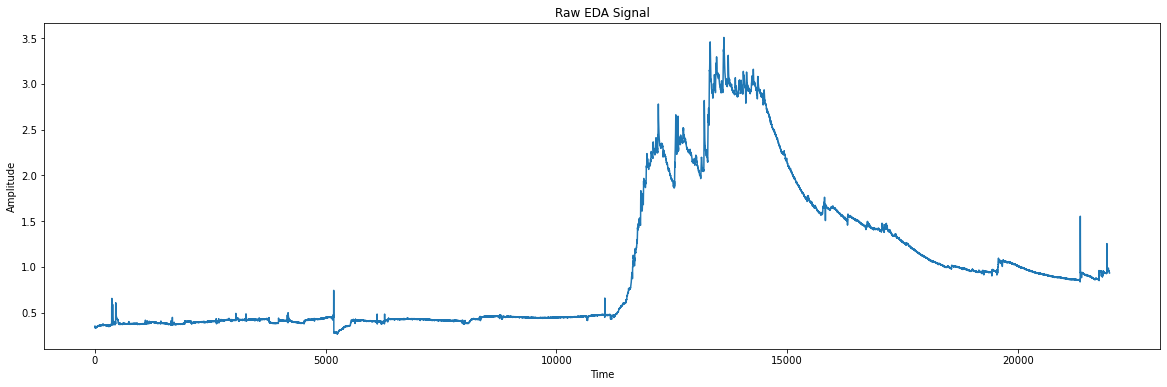

In [5]:
plot_signal(raw_signal, title = 'Raw EDA Signal')

In [14]:
for i, label in enumerate(user_metadata['labels']):
    starting_index = user_metadata['eda']['starting_indices'][i]
    ending_index = user_metadata['eda']['ending_indices'][i]
    trim_indices = (starting_index, ending_index)
    trimmed_signal = get_trimmed_signal(raw_signal, trim_indices, lag = 60, sampling_rate = EDA_SAMPLING_RATE)
    title = f'Raw EDA - {label}'
    # plot_signal(trimmed_signal, title = title)
    print(len(trimmed_signal))
    swt_decomposition = pywt.swt(trimmed_signal, 'Haar', level = 8)
    break

4960


ValueError: Level value too high (max level for current data size and start_level is 5).